<h1><center>Yellow Taxi Simple Analysis</center></h1>

In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

<h2><center>Reading and preparing data</center></h2>

In [2]:
df = pd.read_csv('~Kaggle/nyc_yellow_taxi_trip_records_from_Jan_to_Aug_2023.csv') # Reading data

In [6]:
df.head(10) # Data structure view

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,0,2,2023-06-30 23:59:59,2023-07-01 00:47:49,2.0,17.62,2.0,N,132,230,...,70.0,0.0,0.5,0.00,6.55,1.0,82.30,2.5,1.75,NaN
1,1,2,2023-06-30 23:59:57,2023-07-01 00:17:36,1.0,3.32,1.0,N,255,198,...,18.4,1.0,0.5,2.50,0.00,1.0,23.40,0.0,0.00,NaN
2,2,1,2023-06-30 23:59:55,2023-07-01 00:14:20,1.0,2.80,1.0,N,231,107,...,14.9,3.5,0.5,3.95,0.00,1.0,23.85,2.5,0.00,NaN
3,3,2,2023-06-30 23:59:55,2023-07-01 00:05:52,1.0,0.89,1.0,N,237,163,...,7.2,1.0,0.5,2.00,0.00,1.0,14.20,2.5,0.00,NaN
4,4,2,2023-06-30 23:59:55,2023-07-01 00:07:08,4.0,1.56,1.0,N,211,90,...,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00,NaN
5,5,2,2023-06-30 23:59:54,2023-07-01 00:14:58,1.0,3.85,1.0,N,161,166,...,19.1,1.0,0.5,10.00,0.00,1.0,34.10,2.5,0.00,NaN
6,6,2,2023-06-30 23:59:53,2023-07-01 00:05:52,2.0,1.05,1.0,N,65,33,...,7.9,1.0,0.5,2.08,0.00,1.0,12.48,0.0,0.00,NaN
7,7,2,2023-06-30 23:59:53,2023-07-01 00:08:36,1.0,1.50,1.0,N,107,249,...,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.00,NaN
8,8,1,2023-06-30 23:59:52,2023-07-01 00:15:15,3.0,2.80,1.0,N,48,79,...,14.9,3.5,0.5,4.00,0.00,1.0,23.90,2.5,0.00,NaN
9,9,2,2023-06-30 23:59:51,2023-07-01 00:08:49,1.0,2.17,1.0,N,90,48,...,12.1,1.0,0.5,0.00,0.00,1.0,17.10,2.5,0.00,NaN


We have dublicated index column that we need to drop, and strange Airport_fee and airport_fee duplicated column names, let's check this later

In [7]:
pd.set_option('display.max_columns', None) # Set the full column view option

In [8]:
df = df.drop(columns='Unnamed: 0') # Dropping duplucated index

In [9]:
df.shape # Dataframe shape 

(19493059, 20)

In [10]:
df.info() # Basic dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19493059 entries, 0 to 19493058
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 2.9+ GB


In [11]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']) # Converting dates into proper dtypes
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [12]:
df.isna().sum() # Null values

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count            528530
trip_distance                   0
RatecodeID                 528530
store_and_fwd_flag         528530
PULocationID                    0
DOLocationID                    0
payment_type                    0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge       528530
Airport_fee               3523475
airport_fee              16498114
dtype: int64

airport_fee rows is not completly empty, let's check it further

In [13]:
df.query('airport_fee.isnull()').shape # Let's check count of null in airport_fee

(16498114, 20)

In [14]:
df.query('Airport_fee.notnull()').shape

(15969584, 20)

In [15]:
df.query('airport_fee.isnull()').shape[0] - df.query('Airport_fee.notnull()').shape[0]

528530

In [16]:
df.query('airport_fee.notnull()').query('Airport_fee.notnull()').shape

(0, 20)

In [17]:
df.query('airport_fee.isnull()').query('Airport_fee.isnull()').shape # We found some issues with this some data

(528530, 20)

This is can be merging/joining error, for now we leave it be. Maybe some additional issues comes with it. Keep this in mind.

In [18]:
df.nunique() # Checking unique values

VendorID                       3
tpep_pickup_datetime     9821166
tpep_dropoff_datetime    9817818
passenger_count               10
trip_distance               6962
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 262
DOLocationID                 261
payment_type                   6
fare_amount                12942
extra                        182
mta_tax                       15
tip_amount                  6452
tolls_amount                1909
improvement_surcharge          5
total_amount               27085
congestion_surcharge           6
Airport_fee                    5
airport_fee                    3
dtype: int64

In [19]:
df.fare_amount.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999,0.9995])

count     1.949306e+07
mean      1.915429e+01
std       8.959057e+01
min      -9.599000e+02
0.1%     -5.200000e+01
1%        3.000000e+00
10%       6.500000e+00
25%       9.300000e+00
50%       1.350000e+01
75%       2.120000e+01
90%       4.128000e+01
99%       7.580000e+01
99.9%     1.465000e+02
99.95%    1.800000e+02
max       3.869836e+05
Name: fare_amount, dtype: float64

Negative fare amounts can be a refunds, but we dont have an user_id, so we simply drop 

In [20]:
df.query('fare_amount > 180').fare_amount.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999,0.9995])

count       9403.000000
mean         296.711049
std         3989.814135
min          180.100000
0.1%         180.100000
1%           180.800000
10%          188.500000
25%          200.000000
50%          226.300000
75%          276.700000
90%          350.000000
99%          600.000000
99.9%       1020.497600
99.95%      2007.993750
max       386983.630000
Name: fare_amount, dtype: float64

Checking the upper values and take 200 for upper range

In [21]:
df = df[(df.fare_amount >= 0) & (df.fare_amount <= 200)] # Dropping unreasonable values

In [22]:
df.tip_amount.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999,0.9995]) # Tips can't be negative

count     1.931362e+07
mean      3.523800e+00
std       3.978321e+00
min      -8.800000e+00
0.1%      0.000000e+00
1%        0.000000e+00
10%       0.000000e+00
25%       1.000000e+00
50%       2.850000e+00
75%       4.380000e+00
90%       7.400000e+00
99%       1.745000e+01
99.9%     2.814000e+01
99.95%    3.451000e+01
max       9.843000e+02
Name: tip_amount, dtype: float64

In [23]:
df.total_amount.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999,0.9995]) # As well as total_amount

count     1.931362e+07
mean      2.840416e+01
std       2.182709e+01
min      -1.030000e+01
0.1%      4.500000e+00
1%        9.000000e+00
10%       1.290000e+01
25%       1.596000e+01
50%       2.093000e+01
75%       3.024000e+01
90%       5.930000e+01
99%       1.028500e+02
99.9%     1.616000e+02
99.95%    1.868500e+02
max       1.000000e+03
Name: total_amount, dtype: float64

In [24]:
df = df[(df.total_amount >= 0)] # Drop negative values from total and tip amounts
df = df[(df.tip_amount >= 0)]

In [25]:
df['ride_time'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds() / 60 # Calculate the ride time in min

In [26]:
df.ride_time.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999, 0.9995])

count     1.931264e+07
mean      1.700174e+01
std       4.263736e+01
min      -4.762500e+02
0.1%      6.666667e-02
1%        1.083333e+00
10%       4.700000e+00
25%       7.500000e+00
50%       1.230000e+01
75%       1.990000e+01
90%       3.113333e+01
99%       6.536667e+01
99.9%     1.606667e+02
99.95%    1.418550e+03
max       1.002918e+04
Name: ride_time, dtype: float64

In [27]:
df.query('ride_time > 150').ride_time.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999, 0.9995])

count     19608.000000
mean       1214.483192
std         445.566055
min         150.033333
0.1%        150.626783
1%          156.400000
10%         369.726667
25%        1341.029167
50%        1417.766667
75%        1432.850000
90%        1437.155000
99%        1439.400000
99.9%      3856.937100
99.95%     4625.791250
max       10029.183333
Name: ride_time, dtype: float64

In [28]:
df = df[(df.ride_time >= 0) & (df.ride_time < 350)]

In [29]:
df.extra.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999]) # Negative values can be reduced taxi fares during 
 # during off-peak hours  or low demand periods with a higher number of drivers.

count    1.929392e+07
mean     1.615065e+00
std      1.823711e+00
min     -2.500000e+00
0.1%     0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.500000e+00
90%      4.250000e+00
99%      7.500000e+00
99.9%    1.025000e+01
max      9.638000e+01
Name: extra, dtype: float64

In [30]:
df.extra.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999]) # checking extras

count    1.929392e+07
mean     1.615065e+00
std      1.823711e+00
min     -2.500000e+00
0.1%     0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.500000e+00
90%      4.250000e+00
99%      7.500000e+00
99.9%    1.025000e+01
max      9.638000e+01
Name: extra, dtype: float64

In [31]:
df.query('extra < 0') # Now we see that this ride was cancelled, so its ok

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,ride_time
7015058,1,2023-04-29 02:22:56,2023-04-29 02:23:12,NaN,0.0,NaN,NaN,234,90,0,34.0,-2.5,0.0,0.0,0.0,0.0,34.0,NaN,NaN,NaN,0.266667


In [32]:
df.query('ride_time < 1').shape # This is most likely cancelled rides too

(183584, 21)

In [35]:
df.query('trip_distance == 0').shape # Cancelled rides too

(248284, 21)

In this stage we can separate our df for further analysis

<h2><center>Data analysis and visualization</center></h2>

In [96]:
df_successful_rides = df.query('ride_time > 1').query('fare_amount > 1').query('trip_distance > 1')

In [97]:
df_successful_rides.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,ride_time
0,2,2023-06-30 23:59:59,2023-07-01 00:47:49,2.0,17.62,2.0,N,132,230,1,70.0,0.0,0.5,0.00,6.55,1.0,82.30,2.5,1.75,NaN,47.833333
1,2,2023-06-30 23:59:57,2023-07-01 00:17:36,1.0,3.32,1.0,N,255,198,1,18.4,1.0,0.5,2.50,0.00,1.0,23.40,0.0,0.00,NaN,17.650000
2,1,2023-06-30 23:59:55,2023-07-01 00:14:20,1.0,2.80,1.0,N,231,107,1,14.9,3.5,0.5,3.95,0.00,1.0,23.85,2.5,0.00,NaN,14.416667
4,2,2023-06-30 23:59:55,2023-07-01 00:07:08,4.0,1.56,1.0,N,211,90,1,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00,NaN,7.216667
5,2,2023-06-30 23:59:54,2023-07-01 00:14:58,1.0,3.85,1.0,N,161,166,1,19.1,1.0,0.5,10.00,0.00,1.0,34.10,2.5,0.00,NaN,15.066667


In [98]:
df_successful_rides['fee_per_minute'] = df_successful_rides['total_amount'] / df_successful_rides['ride_time']

In [99]:
df_successful_rides.fee_per_minute.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999,0.9995])

count     1.487694e+07
mean      1.846240e+00
std       7.258017e-01
min       1.730326e-02
0.1%      5.725068e-01
1%        9.650131e-01
10%       1.252667e+00
25%       1.448120e+00
50%       1.726027e+00
75%       2.101633e+00
90%       2.573067e+00
99%       3.785978e+00
99.9%     5.402551e+00
99.95%    6.912615e+00
max       2.068636e+02
Name: fee_per_minute, dtype: float64

In [100]:
df_successful_rides['speed'] = df_successful_rides.trip_distance / (df_successful_rides.ride_time/60)

In [101]:
df_successful_rides.speed.describe()

count    1.487694e+07
mean     1.580754e+01
std      1.367918e+03
min      1.957922e-01
25%      8.102302e+00
50%      1.064039e+01
75%      1.486047e+01
max      2.589282e+06
Name: speed, dtype: float64

In [102]:
df_successful_rides['tip_ratio'] = df_successful_rides.tip_amount / df_successful_rides.fare_amount

In [103]:
df_sr_cor = df_successful_rides[["passenger_count", "trip_distance", "fare_amount", "extra", "tip_amount", "tolls_amount", "total_amount", "ride_time","fee_per_minute","speed","tip_ratio"]]

In [104]:
df_sr_cor = df_sr_cor.dropna()

In [105]:
df_sr_cor

,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,ride_time,fee_per_minute,speed,tip_ratio
0,2.0,17.62,70.0,0.0,0.00,6.55,82.30,47.833333,1.720557,22.101742,0.000000
1,1.0,3.32,18.4,1.0,2.50,0.00,23.40,17.650000,1.325779,11.286119,0.135870
2,1.0,2.80,14.9,3.5,3.95,0.00,23.85,14.416667,1.654335,11.653179,0.265101
4,4.0,1.56,10.0,1.0,3.00,0.00,18.00,7.216667,2.494226,12.969977,0.300000
5,1.0,3.85,19.1,1.0,10.00,0.00,34.10,15.066667,2.263274,15.331858,0.523560
...,...,...,...,...,...,...,...,...,...,...,...
19493053,1.0,8.97,34.5,1.0,25.00,0.00,63.25,12.650000,5.000000,42.545455,0.724638
19493054,1.0,3.80,19.8,1.0,7.44,0.00,32.24,15.016667,2.146948,15.183130,0.375758
19493055,1.0,3.10,16.3,1.0,0.00,0.00,18.80,11.266667,1.668639,16.508876,0.000000
19493056,1.0,1.70,9.3,1.0,0.00,0.00,14.30,5.633333,2.538462,18.106509,0.000000


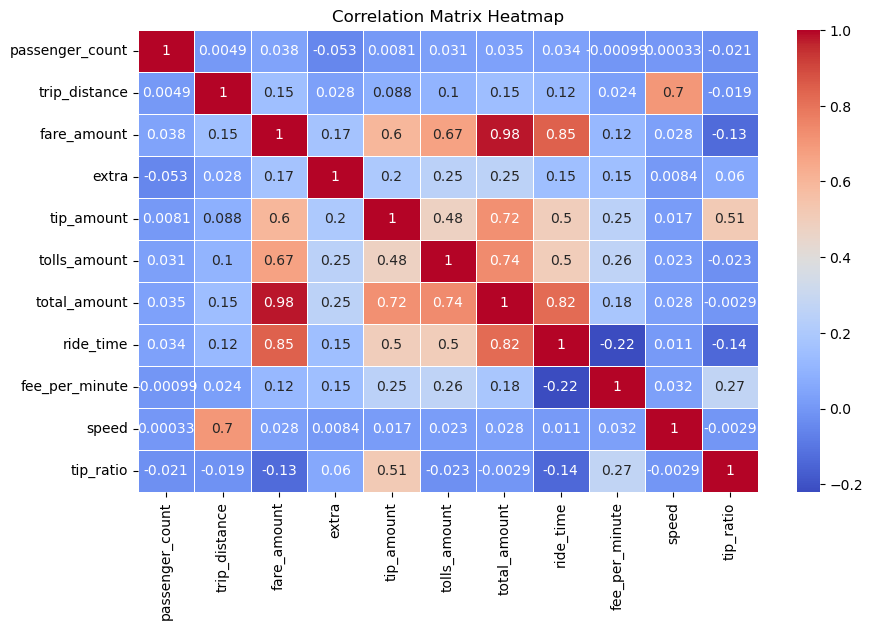

In [106]:
correlation_matrix = df_sr_cor.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

<h2><center>Metrics</center></h2>

In [107]:
round(df_successful_rides.ride_time.mean(),0)

19.0

Average ride time 19 min

In [108]:
round(df_successful_rides.speed.mean(),0)

16.0

Average ride speed 16 mph

In [109]:
df_successful_rides.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,ride_time,fee_per_minute,speed,tip_ratio
0,2,2023-06-30 23:59:59,2023-07-01 00:47:49,2.0,17.62,2.0,N,132,230,1,70.0,0.0,0.5,0.00,6.55,1.0,82.30,2.5,1.75,NaN,47.833333,1.720557,22.101742,0.000000
1,2,2023-06-30 23:59:57,2023-07-01 00:17:36,1.0,3.32,1.0,N,255,198,1,18.4,1.0,0.5,2.50,0.00,1.0,23.40,0.0,0.00,NaN,17.650000,1.325779,11.286119,0.135870
2,1,2023-06-30 23:59:55,2023-07-01 00:14:20,1.0,2.80,1.0,N,231,107,1,14.9,3.5,0.5,3.95,0.00,1.0,23.85,2.5,0.00,NaN,14.416667,1.654335,11.653179,0.265101
4,2,2023-06-30 23:59:55,2023-07-01 00:07:08,4.0,1.56,1.0,N,211,90,1,10.0,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00,NaN,7.216667,2.494226,12.969977,0.300000
5,2,2023-06-30 23:59:54,2023-07-01 00:14:58,1.0,3.85,1.0,N,161,166,1,19.1,1.0,0.5,10.00,0.00,1.0,34.10,2.5,0.00,NaN,15.066667,2.263274,15.331858,0.523560


In [110]:
passanger_count=df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'passenger_count':'sum'})

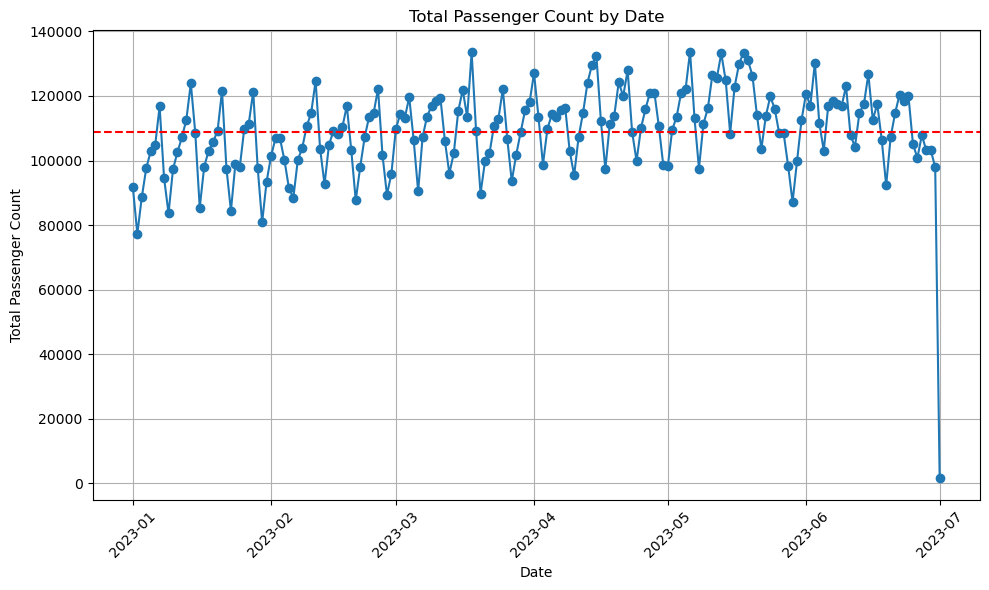

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(passanger_count.index, passanger_count['passenger_count'], marker='o', linestyle='-')

# Customize the plot
plt.title('Total Passenger Count by Date')
plt.xlabel('Date')
plt.ylabel('Total Passenger Count')
plt.grid(True)
plt.axhline(y=passanger_count.passenger_count.mean(), color='r', linestyle='--', label='Avg Overall')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


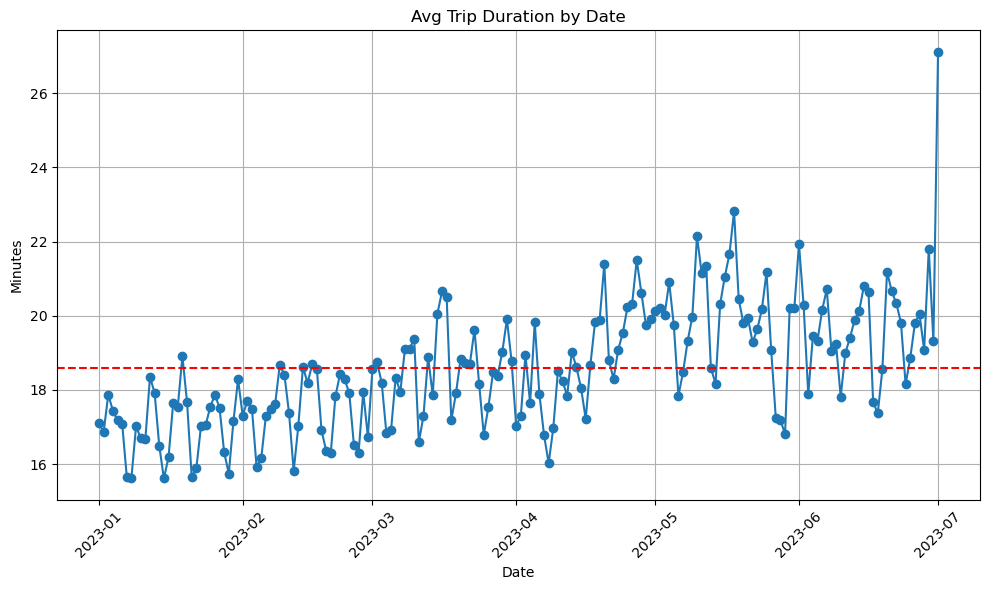

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'ride_time':'mean'}).index, df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'ride_time':'mean'})['ride_time'], marker='o', linestyle='-')

# Customize the plot
plt.title('Avg Trip Duration by Date')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.grid(True)
plt.axhline(y=df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'ride_time':'mean'}).ride_time.mean(), color='r', linestyle='--', label='Avg Trips by Day')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

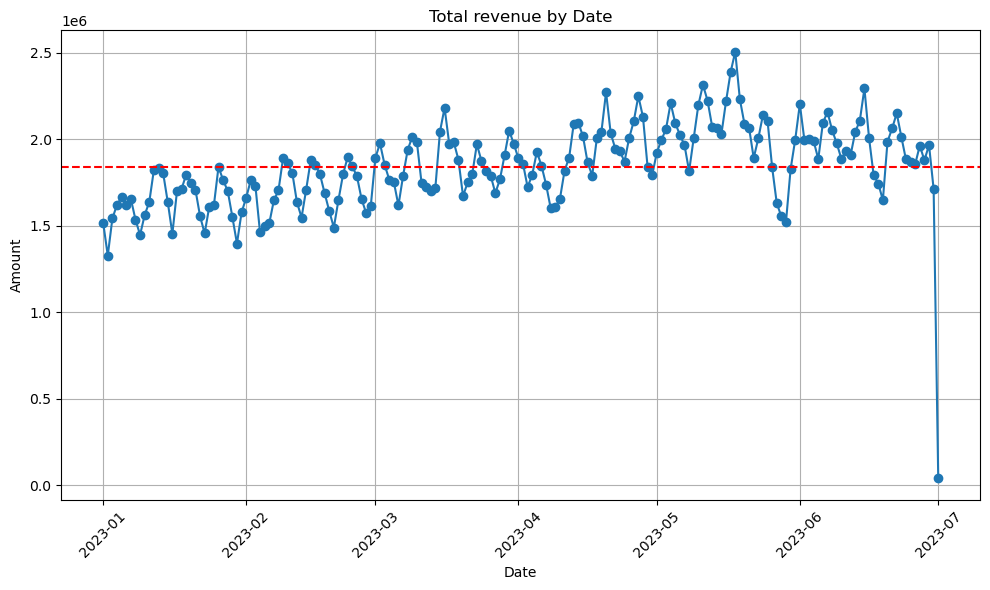

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'fare_amount':'sum'}).index, df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'fare_amount':'sum'})['fare_amount'], marker='o', linestyle='-')

# Customize the plot
plt.title('Total revenue by Date')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.axhline(y=df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'fare_amount':'sum'}).fare_amount.mean(), color='r', linestyle='--', label='Avg Income')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

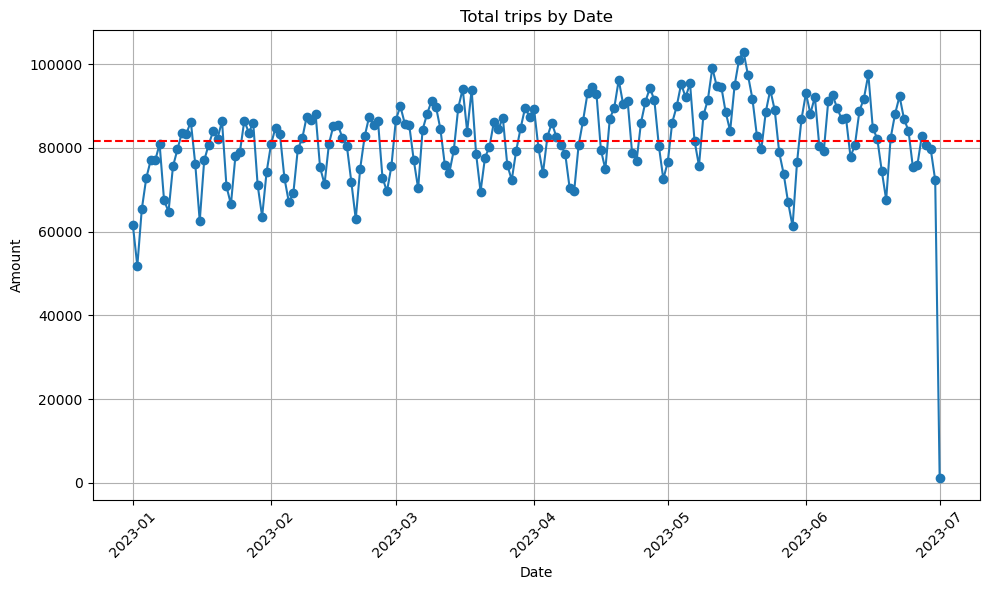

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'fare_amount':'count'}).index, df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'fare_amount':'count'})['fare_amount'], marker='o', linestyle='-')

# Customize the plot
plt.title('Total trips by Date')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.axhline(y=df_successful_rides.groupby([df_successful_rides['tpep_dropoff_datetime'].dt.date]).agg({'fare_amount':'count'}).fare_amount.mean(), color='r', linestyle='--', label='Avg Trips by Day')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [120]:
df_successful_rides.fare_amount.sum()

335087160.61999977

Total revenue from fares 335,087,160.6

In [121]:
df_successful_rides.tip_amount.sum()

59921092.2799999

Total tip's from users 59,921,092.3 USD

In [131]:
df_successful_rides.total_amount.sum()

480376963.98000085

In [122]:
df_successful_rides.tip_amount.sum()/df_successful_rides.fare_amount.sum()

0.17882240599469715

Tips ratio 17,9%

pre-analysis has been conducted for further study.